In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras import backend as K
import tensorflow as tf
import os
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.xception import Xception

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import DenseNet201

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

from matplotlib import pyplot as plt

import numpy as np
import cv2

import skimage.transform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/My Drive/Image_Audio_clustering_GSOC2020/'

/content/drive/My Drive/Image_Audio_clustering_GSOC2020


In [ ]:
#starting the coding from here .......



In [ ]:
ideology_files=os.listdir('ideology_image_dataset/')
ideology_files_path=[os.path.join('ideology_image_dataset',file) for file in ideology_files ]
ideology_files_path.sort()
ideology_files_path[0:5]

['ideology_image_dataset/clip_1.jpg',
 'ideology_image_dataset/clip_10.jpg',
 'ideology_image_dataset/clip_100.jpg',
 'ideology_image_dataset/clip_1000.jpg',
 'ideology_image_dataset/clip_1001.jpg']

In [ ]:
def getOriginalFeatures(filelist):
  filelist.sort()
  featurelist = []
  for i, imagepath in enumerate(filelist):
        print(" Status: %s / %s" %(i, len(filelist)), end="\r")
        img=cv2.imread(imagepath)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        width = 224
        height = 224
        dim = (width, height)
        
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        featurelist.append(resized.flatten())
      
  featurelist = np.asarray(featurelist)
  return featurelist

In [ ]:
def originalPreprocess(imagepath):
        #img=cv2.imread(imagepath)
        #img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #width = 224
        #height = 224
        #dim = (width, height)
        
        #img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        #img=image.img_to_array(img)
        #img = np.expand_dims(img,axis=0)

        img = image.load_img(imagepath, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img,axis=0)
        img = preprocess_input(img)



        return img
      


In [ ]:
def preprocess(img):
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img


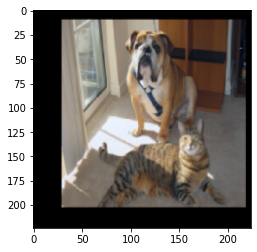

In [ ]:
image_dog = getOriginalFeatures(['dog_cat.png'])
plt.imshow(image_dog.reshape(224,224,3))

In [ ]:
def showImages(file):
  fig = plt.figure()
  plt.figure(figsize=(20,10)) 
  plt.subplot(3, 1, 1)
  filename='ideology_image_dataset/'+file
  image = getOriginalFeatures([filename])
  plt.title("Originial image")
  plt.imshow(image.reshape(224,224,3))

  plt.subplot(3,1,2)
  filename=file.split(".")[0]+'_face.jpg'
  image_person = getOriginalFeatures([filename])
  plt.title("Face + extra image")
  plt.imshow(image_person.reshape(224,224,3))

  plt.subplot(3,1,3)
  filename=file.split(".")[0]+'_person.jpg'
  image_person = getOriginalFeatures([filename])
  plt.title("person image")
  plt.imshow(image_person.reshape(224,224,3))











<Figure size 432x288 with 0 Axes>

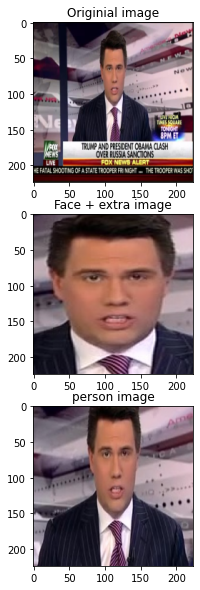

In [ ]:
showImages("clip_1.jpg")

<Figure size 432x288 with 0 Axes>

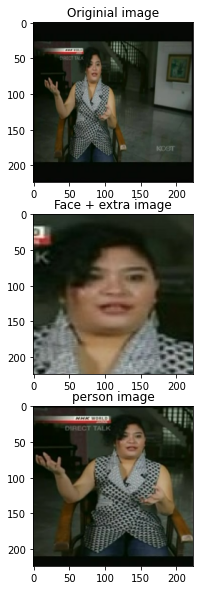

In [ ]:
showImages("clip_10.jpg")

<Figure size 432x288 with 0 Axes>

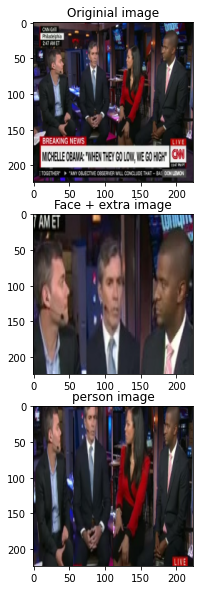

In [ ]:
showImages("clip_1116.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


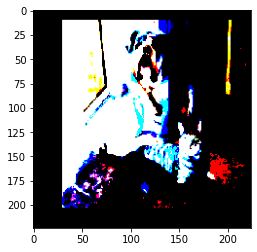

In [ ]:
image_1 = preprocess('dog_cat.png')
image_2=preprocess(ideology_files_path[0])
image_1.shape,image_2.shape
plt.imshow(image_1.reshape(224,224,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


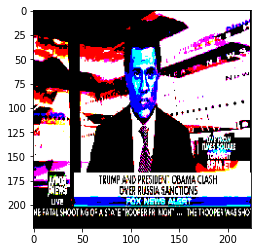

In [ ]:
plt.imshow(image_2.reshape(224,224,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


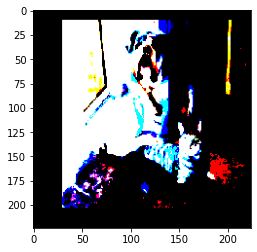

In [ ]:
image_demo=originalPreprocess('dog_cat.png')
print(image_demo.shape)
plt.imshow(image_demo.reshape(224,224,3))

In [ ]:
def cropPreprocess(img_path):
  img=cv2.imread(img_path)
  y=0
  x=0
  h=img.shape[0]
  w=img.shape[1]
  h=h*0.7
  h=int(h)
  #w=w*0.7
  #w=int(w)
  crop_img=img[y+5:y+h,x:x+w]
  img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  width = 224
  height = 224
  dim = (width, height)

  img = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
  img=np.expand_dims(img,axis=0)
  return img




  

In [ ]:
def findConvolutionLayerName(model):
  for layer in reversed(model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name


In [ ]:
def gradCam(image_path,model_name="vgg16",method="preprocess"):
  if(method=="preprocess"):
    img=preprocess(image_path)
  
  elif(method=="originalpreprocess"):
    img=originalPreprocess(image_path)
  
  elif(method=="croppreprocess"):
    img=cropPreprocess(image_path)
  

  
  print("shape of the input is",img.shape)
  if(model_name=="vgg16"):
    multiplication_upto=512
    #conv_layer_name='block5_conv3'
    model = VGG16(weights='imagenet')
  
  elif(model_name=="resnet50"):
    multiplication_upto=2048
    #conv_layer_name='conv5_block3_add'
    model=ResNet50(weights="imagenet")
  
  elif(model_name=="vgg19"):
    model=VGG19(weights="imagenet")

  elif(model_name=="xception"):
    model=Xception(weights="imagenet")

  elif(model_name=="densenet121"):
    model= DenseNet121(weights="imagenet")

  elif(model_name=="densenet169"):
    model= DenseNet169(weights="imagenet")


  elif(model_name=="densenet201"):
    model= DenseNet201(weights="imagenet")

  elif(model_name=="mobilenet"):
    model= MobileNet(weights="imagenet")

  elif(model_name=="inceptionv3"):
    model= InceptionV3(weights="imagenet")
  
  elif(model_name=="inceptionresnet"):
    model= InceptionResNetV2(weights="imagenet")

  
  

  
  conv_layer_name=findConvolutionLayerName(model)
  print(conv_layer_name)
  
  predict = model.predict(img)
  print(decode_predictions(predict,top=1000))
  target_class = np.argmax(predict[0])
  print("Target Class = %d"%target_class)

  tf.compat.v1.disable_eager_execution()
  
  last_conv = model.get_layer(conv_layer_name)

  grads = K.gradients(model.output[:,target_class],last_conv.output)[0]
  pooled_grads = K.mean(grads,axis=(0,1,2))
  iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
  pooled_grads_value,conv_layer_output = iterate([img])
  
  #print(grads.shape,pooled_grads.shape)
  multiplication_upto=pooled_grads.shape[0]
  print("mul",multiplication_upto)
  for i in range(multiplication_upto):
      conv_layer_output[:,:,i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output,axis=-1)
  for x in range(heatmap.shape[0]):
    for y in range(heatmap.shape[1]):
        heatmap[x,y] = np.max(heatmap[x,y],0)

  heatmap = np.maximum(heatmap,0)
  heatmap /= np.max(heatmap)
  plt.imshow(heatmap)

  upsample = skimage.transform.resize(heatmap, (224,224),preserve_range=True)
  plt.title("The Attention for %s" %model_name)
  plt.imshow(img.reshape(224,224,3))
  plt.imshow(upsample,alpha=0.7)
  
  plt.show()








  





shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n02108089', 'boxer', 0.515999), ('n02108422', 'bull_mastiff', 0.18960145), ('n02109047', 'Great_Dane', 0.07031751), ('n02087394', 'Rhodesian_ridgeback', 0.03513645), ('n04404412', 'television', 0.02847824), ('n02123159', 'tiger_cat', 0.021924099), ('n02088466', 'bloodhound', 0.021755768), ('n02129604', 'tiger', 0.013974622), ('n03803284', 'muzzle', 0.011766639), ('n06359193', 'web_site', 0.010204238), ('n02090379', 'redbone', 0.0074201277), ('n02112706', 'Brabancon_griffon', 0.00374002), ('n04589890', 'window_screen', 0.002848492), ('n02127052', 'lynx', 0.0021718608), ('n02138441', 'meerkat', 0.0021037154), ('n04152593', 'screen', 0.0019220824), ('n02091134', 'whippet', 0.0018010539), ('n04239074', 'sliding_door', 0.0017263753), ('n02089078', 'black-and-tan_coonhound', 0.0014972055), ('n02110958', 'pug', 0.0014624064), ('n02093754', 'Border_terrier', 0.0012835708), ('n02788148', 'bannister', 0.0012744325), ('n02117135', 'hyena

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


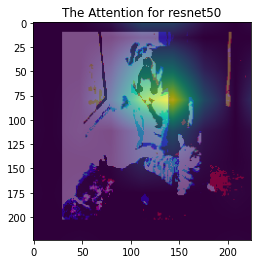

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n02091134', 'whippet', 0.16497785), ('n02108089', 'boxer', 0.08501967), ('n02129604', 'tiger', 0.06896931), ('n02109525', 'Saint_Bernard', 0.060975127), ('n02109047', 'Great_Dane', 0.05960765), ('n02088364', 'beagle', 0.058206793), ('n02089867', 'Walker_hound', 0.045723777), ('n02123159', 'tiger_cat', 0.043302875), ('n02108422', 'bull_mastiff', 0.043105803), ('n02088466', 'bloodhound', 0.03042084), ('n02088632', 'bluetick', 0.028602544), ('n02087394', 'Rhodesian_ridgeback', 0.028184248), ('n02089973', 'English_foxhound', 0.020447321), ('n03803284', 'muzzle', 0.018532593), ('n02088238', 'basset', 0.015403055), ('n02106662', 'German_shepherd', 0.01330237), ('n02093428', 'American_Staffordshire_terrier', 0.0119304685), ('n02090379', 'redbone', 0.011019368), ('n02110958', 'pug', 0.010364496), ('n02099712', 'Labrador_retriever', 0.010306863), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.009664542), ('n02108000', 'EntleBucher', 0.008913

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


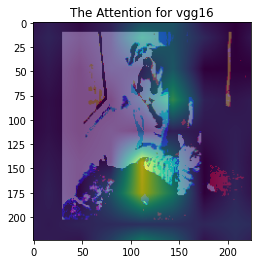

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n02129604', 'tiger', 0.5704733), ('n02123159', 'tiger_cat', 0.15673062), ('n02109047', 'Great_Dane', 0.06346467), ('n02108422', 'bull_mastiff', 0.031390306), ('n03803284', 'muzzle', 0.023114372), ('n02108089', 'boxer', 0.015274491), ('n02091134', 'whippet', 0.014994334), ('n02110958', 'pug', 0.014805123), ('n02106662', 'German_shepherd', 0.009995646), ('n02088466', 'bloodhound', 0.0098465355), ('n02129165', 'lion', 0.0066881385), ('n02138441', 'meerkat', 0.006365513), ('n02124075', 'Egyptian_cat', 0.005632082), ('n02110341', 'dalmatian', 0.004870369), ('n02087394', 'Rhodesian_ridgeback', 0.004511922), ('n02125311', 'cougar', 0.003672505), ('n02123045', 'tabby', 0.002619255), ('n02105162', 'malinois', 0.0020575128), ('n02090721', 'Irish_wolfhound', 0.0018606852), ('n02114367', 'timber_wolf', 0.0018176569), ('n02115641', 'dingo', 0.0016155139), ('n02127052', 'lynx', 0.0015114861), ('n02093428', 'American_Staffordshire_terrier', 0.001

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


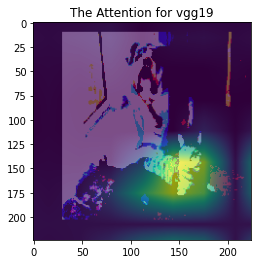

shape of the input is (1, 224, 224, 3)


KeyboardInterrupt: ignored

In [ ]:
# sanple testing in a dog image 
gradCam('dog_cat.png','resnet50','preprocess')
gradCam('dog_cat.png','vgg16','preprocess')
gradCam('dog_cat.png','vgg19','preprocess')
#gradCam('dog_cat.png','xception','preprocess')
gradCam('dog_cat.png','densenet121','preprocess')
gradCam('dog_cat.png','densenet169','preprocess')
gradCam('dog_cat.png','densenet201','preprocess')
gradCam('dog_cat.png','mobilenet','preprocess')
#gradCam('dog_cat.png','inceptionv3','preprocess')
#gradCam('dog_cat.png','inceptionresnet','preprocess')

In [ ]:
# testing on the normal image 

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04591157', 'Windsor_tie', 0.6164613), ('n06359193', 'web_site', 0.20207906), ('n04350905', 'suit', 0.07410658), ('n03594734', 'jean', 0.012386704), ('n10148035', 'groom', 0.009327788), ('n04404412', 'television', 0.008195227), ('n06596364', 'comic_book', 0.0048095174), ('n03680355', 'Loafer', 0.0045107417), ('n03759954', 'microphone', 0.004046381), ('n03670208', 'limousine', 0.0031066323), ('n03450230', 'gown', 0.0027842082), ('n04356056', 'sunglasses', 0.002760146), ('n03814639', 'neck_brace', 0.0024237316), ('n03495258', 'harp', 0.001964898), ('n04456115', 'torch', 0.001856844), ('n02917067', 'bullet_train', 0.0018086537), ('n02865351', 'bolo_tie', 0.0015512073), ('n02883205', 'bow_tie', 0.0015192172), ('n04266014', 'space_shuttle', 0.0014724948), ('n02992529', 'cellular_telephone', 0.0013654921), ('n03782006', 'monitor', 0.0011996956), ('n03832673', 'notebook', 0.0011964844), ('n04238763', 'slide_rule', 0.0010700494), ('n0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


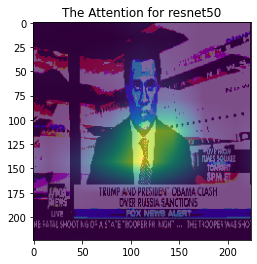

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n06359193', 'web_site', 0.5512109), ('n04591157', 'Windsor_tie', 0.19467725), ('n04350905', 'suit', 0.11000021), ('n06596364', 'comic_book', 0.022809587), ('n10148035', 'groom', 0.012284998), ('n07248320', 'book_jacket', 0.0102109965), ('n03617480', 'kimono', 0.007917348), ('n04404412', 'television', 0.007862736), ('n02669723', 'academic_gown', 0.006281975), ('n04501370', 'turnstile', 0.0052978727), ('n04149813', 'scoreboard', 0.004891614), ('n02883205', 'bow_tie', 0.0041745254), ('n04456115', 'torch', 0.0038656737), ('n03787032', 'mortarboard', 0.002752192), ('n07565083', 'menu', 0.0021684289), ('n03782006', 'monitor', 0.0020882552), ('n03450230', 'gown', 0.0017430023), ('n04118776', 'rule', 0.001472463), ('n03032252', 'cinema', 0.0011940396), ('n02977058', 'cash_machine', 0.0011335245), ('n04507155', 'umbrella', 0.0010486277), ('n03630383', 'lab_coat', 0.0010426545), ('n03832673', 'notebook', 0.0010161889), ('n02788148', 'bannist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


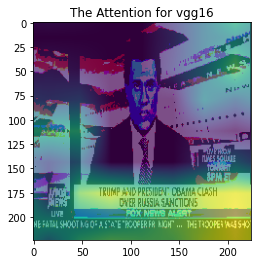

"\ngradCam(ideology_files_path[0],'vgg19','preprocess')\n\ngradCam(ideology_files_path[0],'densenet121','preprocess')\ngradCam(ideology_files_path[0],'densenet169','preprocess')\ngradCam(ideology_files_path[0],'densenet201','preprocess')\ngradCam(ideology_files_path[0],'mobilenet','preprocess')\n"

In [ ]:
gradCam(ideology_files_path[0],'resnet50','preprocess')
gradCam(ideology_files_path[0],'vgg16','preprocess')
"""
gradCam(ideology_files_path[0],'vgg19','preprocess')

gradCam(ideology_files_path[0],'densenet121','preprocess')
gradCam(ideology_files_path[0],'densenet169','preprocess')
gradCam(ideology_files_path[0],'densenet201','preprocess')
gradCam(ideology_files_path[0],'mobilenet','preprocess')
"""

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04591157', 'Windsor_tie', 0.8629094), ('n04350905', 'suit', 0.13141863), ('n02883205', 'bow_tie', 0.0054648262), ('n02669723', 'academic_gown', 7.139435e-05), ('n02865351', 'bolo_tie', 4.6704365e-05), ('n10148035', 'groom', 2.3218709e-05), ('n03787032', 'mortarboard', 7.8898365e-06), ('n03838899', 'oboe', 5.586032e-06), ('n03630383', 'lab_coat', 5.210718e-06), ('n03485407', 'hand-held_computer', 3.985541e-06), ('n02804610', 'bassoon', 3.127234e-06), ('n03680355', 'Loafer', 2.4906772e-06), ('n04325704', 'stole', 2.4389115e-06), ('n04162706', 'seat_belt', 2.3393775e-06), ('n03476684', 'hair_slide', 1.9905247e-06), ('n02916936', 'bulletproof_vest', 1.9051753e-06), ('n04599235', 'wool', 1.674322e-06), ('n03450230', 'gown', 1.5249951e-06), ('n02948072', 'candle', 1.0692264e-06), ('n02786058', 'Band_Aid', 1.0485608e-06), ('n03832673', 'notebook', 1.0443961e-06), ('n03670208', 'limousine', 9.789546e-07), ('n04317175', 'stethoscope',

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


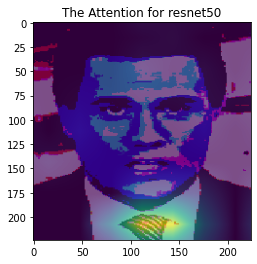

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n04591157', 'Windsor_tie', 0.358298), ('n02883205', 'bow_tie', 0.31939608), ('n04350905', 'suit', 0.3001167), ('n10148035', 'groom', 0.007563895), ('n03787032', 'mortarboard', 0.0042120093), ('n02669723', 'academic_gown', 0.0040677176), ('n02865351', 'bolo_tie', 0.0012659018), ('n03838899', 'oboe', 0.0011100515), ('n03630383', 'lab_coat', 0.00090342487), ('n03832673', 'notebook', 0.0003449068), ('n02804610', 'bassoon', 0.000259579), ('n03110669', 'cornet', 0.00017380514), ('n03763968', 'military_uniform', 0.00017187814), ('n03485407', 'hand-held_computer', 0.00014926931), ('n04162706', 'seat_belt', 0.00012441442), ('n02916936', 'bulletproof_vest', 8.594825e-05), ('n03394916', 'French_horn', 6.7767854e-05), ('n03670208', 'limousine', 6.742528e-05), ('n02672831', 'accordion', 6.6087625e-05), ('n03814639', 'neck_brace', 6.4668486e-05), ('n04532106', 'vestment', 6.278534e-05), ('n04317175', 'stethoscope', 6.185333e-05), ('n03680355', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


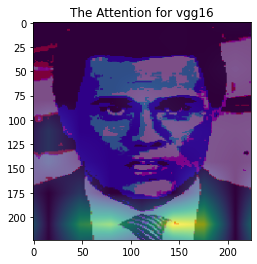

'\ngradCam("clip_1_face.jpg",\'vgg19\',\'preprocess\')\n\ngradCam("clip_1_face.jpg",\'densenet121\',\'preprocess\')\ngradCam("clip_1_face.jpg",\'densenet169\',\'preprocess\')\ngradCam("clip_1_face.jpg",\'densenet201\',\'preprocess\')\ngradCam("clip_1_face.jpg",\'mobilenet\',\'preprocess\')\n'

In [ ]:
#this is for the face only 
gradCam("clip_1_face.jpg",'resnet50','preprocess')
gradCam("clip_1_face.jpg",'vgg16','preprocess')
"""
gradCam("clip_1_face.jpg",'vgg19','preprocess')

gradCam("clip_1_face.jpg",'densenet121','preprocess')
gradCam("clip_1_face.jpg",'densenet169','preprocess')
gradCam("clip_1_face.jpg",'densenet201','preprocess')
gradCam("clip_1_face.jpg",'mobilenet','preprocess')
"""

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04350905', 'suit', 0.7271799), ('n04591157', 'Windsor_tie', 0.265121), ('n03450230', 'gown', 0.0060192775), ('n10148035', 'groom', 0.0008737053), ('n04456115', 'torch', 0.00012380307), ('n03680355', 'Loafer', 0.00011996842), ('n03832673', 'notebook', 9.907345e-05), ('n02917067', 'bullet_train', 3.8395585e-05), ('n03594734', 'jean', 3.5665314e-05), ('n03617480', 'kimono', 2.3396846e-05), ('n04525038', 'velvet', 2.3390689e-05), ('n02865351', 'bolo_tie', 2.3073202e-05), ('n02669723', 'academic_gown', 2.3058552e-05), ('n03670208', 'limousine', 1.658142e-05), ('n02883205', 'bow_tie', 1.5540641e-05), ('n03838899', 'oboe', 1.4622478e-05), ('n02948072', 'candle', 1.3470665e-05), ('n03866082', 'overskirt', 1.2106194e-05), ('n03485407', 'hand-held_computer', 1.1881642e-05), ('n03759954', 'microphone', 8.213551e-06), ('n03495258', 'harp', 7.974007e-06), ('n03710637', 'maillot', 7.909674e-06), ('n02992529', 'cellular_telephone', 7.902889

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


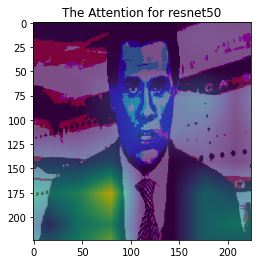

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n04350905', 'suit', 0.5582621), ('n04591157', 'Windsor_tie', 0.31139925), ('n03617480', 'kimono', 0.025140187), ('n10148035', 'groom', 0.018607866), ('n02669723', 'academic_gown', 0.008491244), ('n04325704', 'stole', 0.00772111), ('n04479046', 'trench_coat', 0.0068343785), ('n02883205', 'bow_tie', 0.0064725387), ('n03630383', 'lab_coat', 0.0060057933), ('n03680355', 'Loafer', 0.0043349536), ('n03787032', 'mortarboard', 0.004124288), ('n02917067', 'bullet_train', 0.0030217709), ('n02667093', 'abaya', 0.0016188779), ('n02963159', 'cardigan', 0.0015189946), ('n03877472', 'pajama', 0.0014636694), ('n03594734', 'jean', 0.0013512203), ('n06359193', 'web_site', 0.001077027), ('n02672831', 'accordion', 0.001034725), ('n03814639', 'neck_brace', 0.0010059293), ('n03832673', 'notebook', 0.000990861), ('n04599235', 'wool', 0.0009654434), ('n04532106', 'vestment', 0.0007320776), ('n04456115', 'torch', 0.0006662414), ('n04259630', 'sombrero', 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


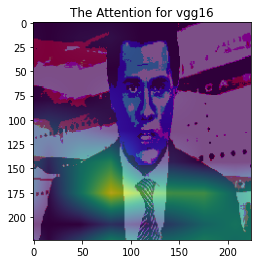

'\ngradCam("clip_1_person.jpg",\'vgg19\',\'preprocess\')\n\ngradCam("clip_1_person.jpg",\'densenet121\',\'preprocess\')\ngradCam("clip_1_person.jpg",\'densenet169\',\'preprocess\')\ngradCam("clip_1_person.jpg",\'densenet201\',\'preprocess\')\ngradCam("clip_1_person.jpg",\'mobilenet\',\'preprocess\')\n'

In [ ]:
#this is for the person only
gradCam("clip_1_person.jpg",'resnet50','preprocess')
gradCam("clip_1_person.jpg",'vgg16','preprocess')
"""
gradCam("clip_1_person.jpg",'vgg19','preprocess')

gradCam("clip_1_person.jpg",'densenet121','preprocess')
gradCam("clip_1_person.jpg",'densenet169','preprocess')
gradCam("clip_1_person.jpg",'densenet201','preprocess')
gradCam("clip_1_person.jpg",'mobilenet','preprocess')
"""

In [ ]:
#for the second image

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n02977058', 'cash_machine', 0.31051075), ('n06359193', 'web_site', 0.2689649), ('n04404412', 'television', 0.20084497), ('n04525305', 'vending_machine', 0.0286546), ('n03782006', 'monitor', 0.022802994), ('n04152593', 'screen', 0.011338086), ('n03617480', 'kimono', 0.0111225685), ('n03529860', 'home_theater', 0.009387935), ('n02777292', 'balance_beam', 0.007595508), ('n03594734', 'jean', 0.006708253), ('n04591157', 'Windsor_tie', 0.006008195), ('n02788148', 'bannister', 0.004638463), ('n03877472', 'pajama', 0.004409362), ('n03485407', 'hand-held_computer', 0.0039920267), ('n04589890', 'window_screen', 0.0039420296), ('n02992529', 'cellular_telephone', 0.0037011197), ('n04501370', 'turnstile', 0.0030418446), ('n07248320', 'book_jacket', 0.0026824723), ('n03970156', 'plunger', 0.0025659178), ('n04456115', 'torch', 0.0024347687), ('n03180011', 'desktop_computer', 0.0024169446), ('n04356056', 'sunglasses', 0.002340311), ('n0353578

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


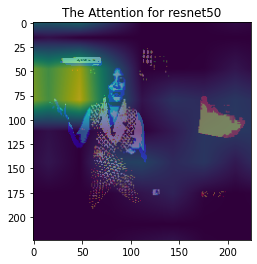

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n04404412', 'television', 0.6657631), ('n03782006', 'monitor', 0.07978128), ('n06359193', 'web_site', 0.060166616), ('n03529860', 'home_theater', 0.034965254), ('n04152593', 'screen', 0.019299412), ('n02977058', 'cash_machine', 0.0147890495), ('n03450230', 'gown', 0.009238784), ('n10148035', 'groom', 0.00892009), ('n03617480', 'kimono', 0.007417497), ('n04009552', 'projector', 0.0067667626), ('n04201297', 'shoji', 0.0062994203), ('n04239074', 'sliding_door', 0.005646651), ('n04350905', 'suit', 0.004900102), ('n03452741', 'grand_piano', 0.0047188443), ('n03832673', 'notebook', 0.0038052353), ('n04501370', 'turnstile', 0.003544345), ('n02992529', 'cellular_telephone', 0.0031694027), ('n03642806', 'laptop', 0.0028591952), ('n04296562', 'stage', 0.00221203), ('n03877472', 'pajama', 0.0020230857), ('n03180011', 'desktop_computer', 0.001974257), ('n03982430', 'pool_table', 0.0019052502), ('n04589890', 'window_screen', 0.0018396572), ('n0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


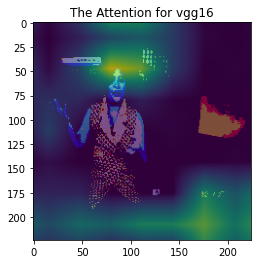

"\ngradCam(ideology_files_path[1],'vgg19','preprocess')\n\ngradCam(ideology_files_path[1],'densenet121','preprocess')\ngradCam(ideology_files_path[1],'densenet169','preprocess')\ngradCam(ideology_files_path[1],'densenet201','preprocess')\ngradCam(ideology_files_path[1],'mobilenet','preprocess')\n"

In [ ]:
gradCam(ideology_files_path[1],'resnet50','preprocess')
gradCam(ideology_files_path[1],'vgg16','preprocess')
"""
gradCam(ideology_files_path[1],'vgg19','preprocess')

gradCam(ideology_files_path[1],'densenet121','preprocess')
gradCam(ideology_files_path[1],'densenet169','preprocess')
gradCam(ideology_files_path[1],'densenet201','preprocess')
gradCam(ideology_files_path[1],'mobilenet','preprocess')
"""

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04162706', 'seat_belt', 0.12343821), ('n03000247', 'chain_mail', 0.11187889), ('n03877472', 'pajama', 0.06554663), ('n03763968', 'military_uniform', 0.03896211), ('n02817516', 'bearskin', 0.03703344), ('n04584207', 'wig', 0.028696725), ('n03814639', 'neck_brace', 0.026411463), ('n03942813', 'ping-pong_ball', 0.024129717), ('n02786058', 'Band_Aid', 0.022353135), ('n02977058', 'cash_machine', 0.01999307), ('n02443114', 'polecat', 0.018085865), ('n04404412', 'television', 0.016909856), ('n03642806', 'laptop', 0.016844463), ('n04591157', 'Windsor_tie', 0.015822157), ('n03630383', 'lab_coat', 0.014638923), ('n03485407', 'hand-held_computer', 0.012012757), ('n03476991', 'hair_spray', 0.011599491), ('n03188531', 'diaper', 0.011530645), ('n04356056', 'sunglasses', 0.0114118075), ('n02948072', 'candle', 0.010899109), ('n04456115', 'torch', 0.010567259), ('n04152593', 'screen', 0.010558919), ('n02965783', 'car_mirror', 0.009027737), ('

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


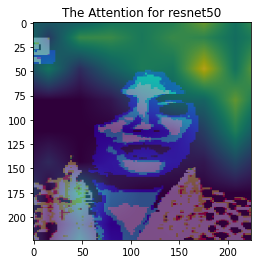

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n03000247', 'chain_mail', 0.40790132), ('n03980874', 'poncho', 0.10721988), ('n03124170', 'cowboy_hat', 0.050014775), ('n04325704', 'stole', 0.040833447), ('n03404251', 'fur_coat', 0.03407462), ('n02869837', 'bonnet', 0.033827588), ('n03814639', 'neck_brace', 0.02179501), ('n03877472', 'pajama', 0.019376501), ('n04259630', 'sombrero', 0.012637054), ('n04584207', 'wig', 0.011088975), ('n02963159', 'cardigan', 0.010694481), ('n02807133', 'bathing_cap', 0.008543098), ('n03045698', 'cloak', 0.008536701), ('n03866082', 'overskirt', 0.007840683), ('n04209133', 'shower_cap', 0.0075836685), ('n03534580', 'hoopskirt', 0.0067639346), ('n02883205', 'bow_tie', 0.0060912715), ('n03630383', 'lab_coat', 0.0058918465), ('n04356056', 'sunglasses', 0.005834731), ('n03710637', 'maillot', 0.0054352614), ('n04370456', 'sweatshirt', 0.0051433747), ('n04599235', 'wool', 0.0047555743), ('n03759954', 'microphone', 0.004160373), ('n02892767', 'brassiere', 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


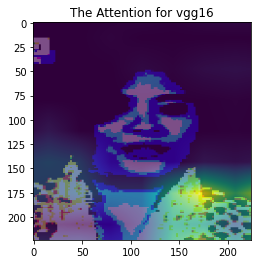

'\ngradCam("clip_10_face.jpg",\'vgg19\',\'preprocess\')\n\ngradCam("clip_10_face.jpg",\'densenet121\',\'preprocess\')\ngradCam("clip_10_face.jpg",\'densenet169\',\'preprocess\')\ngradCam("clip_10_face.jpg",\'densenet201\',\'preprocess\')\ngradCam("clip_10_face.jpg",\'mobilenet\',\'preprocess\')\n\n'

In [ ]:
#this is for the face only 
gradCam("clip_10_face.jpg",'resnet50','preprocess')
gradCam("clip_10_face.jpg",'vgg16','preprocess')
"""
gradCam("clip_10_face.jpg",'vgg19','preprocess')

gradCam("clip_10_face.jpg",'densenet121','preprocess')
gradCam("clip_10_face.jpg",'densenet169','preprocess')
gradCam("clip_10_face.jpg",'densenet201','preprocess')
gradCam("clip_10_face.jpg",'mobilenet','preprocess')

"""

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n02977058', 'cash_machine', 0.17115143), ('n04525305', 'vending_machine', 0.15205401), ('n04404412', 'television', 0.14494741), ('n04591157', 'Windsor_tie', 0.07585439), ('n04501370', 'turnstile', 0.030381208), ('n02916936', 'bulletproof_vest', 0.024742715), ('n06359193', 'web_site', 0.020841952), ('n07248320', 'book_jacket', 0.017093366), ('n04443257', 'tobacco_shop', 0.01320045), ('n04152593', 'screen', 0.0115377195), ('n03661043', 'library', 0.011511012), ('n03877472', 'pajama', 0.011288601), ('n04350905', 'suit', 0.011094325), ('n04589890', 'window_screen', 0.010940181), ('n03594734', 'jean', 0.01084299), ('n04149813', 'scoreboard', 0.010532725), ('n04005630', 'prison', 0.009231363), ('n03924679', 'photocopier', 0.0076195695), ('n02777292', 'balance_beam', 0.006701117), ('n03347037', 'fire_screen', 0.0066321325), ('n02871525', 'bookshop', 0.0063633355), ('n03782006', 'monitor', 0.005136181), ('n02730930', 'apron', 0.005003

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


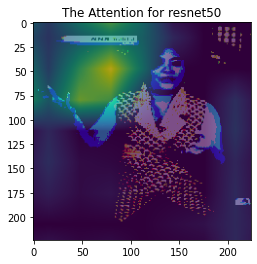

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n04404412', 'television', 0.2995709), ('n04501370', 'turnstile', 0.16407649), ('n03452741', 'grand_piano', 0.03268459), ('n06359193', 'web_site', 0.032086983), ('n03782006', 'monitor', 0.0257382), ('n02977058', 'cash_machine', 0.024260221), ('n04350905', 'suit', 0.014242297), ('n03721384', 'marimba', 0.014098288), ('n04009552', 'projector', 0.013035469), ('n03617480', 'kimono', 0.01247335), ('n04591157', 'Windsor_tie', 0.011902306), ('n04152593', 'screen', 0.011261105), ('n03670208', 'limousine', 0.010680062), ('n03642806', 'laptop', 0.009690382), ('n02917067', 'bullet_train', 0.009172622), ('n04296562', 'stage', 0.007494755), ('n03877472', 'pajama', 0.007369189), ('n03450230', 'gown', 0.0068386425), ('n02791270', 'barbershop', 0.0068126214), ('n03770439', 'miniskirt', 0.0064517735), ('n03924679', 'photocopier', 0.0061092265), ('n04443257', 'tobacco_shop', 0.005826129), ('n04081281', 'restaurant', 0.005526394), ('n03942813', 'ping-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


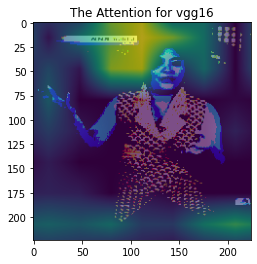

'\ngradCam("clip_10_person.jpg",\'vgg19\',\'preprocess\')\n#gradCam(ideology_files_path[0],\'xception\',\'preprocess\')\ngradCam("clip_10_person.jpg",\'densenet121\',\'preprocess\')\ngradCam("clip_10_person.jpg",\'densenet169\',\'preprocess\')\ngradCam("clip_10_person.jpg",\'densenet201\',\'preprocess\')\ngradCam("clip_10_person.jpg",\'mobilenet\',\'preprocess\')\n#gradCam(ideology_files_path[0],\'inceptionv3\',\'preprocess\')\n#gradCam(ideology_files_path[0],\'inceptionresnet\',\'preprocess\')\n'

In [ ]:
#this is for the person only
gradCam("clip_10_person.jpg",'resnet50','preprocess')
gradCam("clip_10_person.jpg",'vgg16','preprocess')
"""
gradCam("clip_10_person.jpg",'vgg19','preprocess')
#gradCam(ideology_files_path[0],'xception','preprocess')
gradCam("clip_10_person.jpg",'densenet121','preprocess')
gradCam("clip_10_person.jpg",'densenet169','preprocess')
gradCam("clip_10_person.jpg",'densenet201','preprocess')
gradCam("clip_10_person.jpg",'mobilenet','preprocess')
#gradCam(ideology_files_path[0],'inceptionv3','preprocess')
#gradCam(ideology_files_path[0],'inceptionresnet','preprocess')
"""

In [ ]:
# trying for the third image 

shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n10148035', 'groom', 0.6976962), ('n04591157', 'Windsor_tie', 0.18186596), ('n04350905', 'suit', 0.053847834), ('n03670208', 'limousine', 0.019420655), ('n04090263', 'rifle', 0.007169974), ('n02883205', 'bow_tie', 0.006111872), ('n02669723', 'academic_gown', 0.0041553807), ('n06359193', 'web_site', 0.0038835453), ('n03450230', 'gown', 0.0033307641), ('n03680355', 'Loafer', 0.0018321542), ('n06596364', 'comic_book', 0.0015497005), ('n03763968', 'military_uniform', 0.001342269), ('n02804610', 'bassoon', 0.0012498097), ('n03594734', 'jean', 0.0009712003), ('n03197337', 'digital_watch', 0.00092877797), ('n04501370', 'turnstile', 0.0009024954), ('n03110669', 'cornet', 0.00082256575), ('n04356056', 'sunglasses', 0.0006711499), ('n04228054', 'ski', 0.00052300567), ('n04456115', 'torch', 0.0005225014), ('n02916936', 'bulletproof_vest', 0.00050368224), ('n02749479', 'assault_rifle', 0.0004977413), ('n03617480', 'kimono', 0.00046962567)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


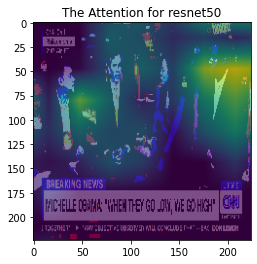

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n06359193', 'web_site', 0.44804764), ('n06596364', 'comic_book', 0.10289805), ('n04350905', 'suit', 0.0804789), ('n04591157', 'Windsor_tie', 0.050415408), ('n04404412', 'television', 0.025587324), ('n02669723', 'academic_gown', 0.02475842), ('n03763968', 'military_uniform', 0.020391745), ('n04243546', 'slot', 0.014558107), ('n03782006', 'monitor', 0.012892072), ('n04296562', 'stage', 0.012780027), ('n04501370', 'turnstile', 0.010356864), ('n02977058', 'cash_machine', 0.009147491), ('n04525305', 'vending_machine', 0.007920247), ('n03787032', 'mortarboard', 0.0076335818), ('n04149813', 'scoreboard', 0.0068763164), ('n02883205', 'bow_tie', 0.0068465527), ('n03196217', 'digital_clock', 0.0063364515), ('n10148035', 'groom', 0.0057428274), ('n03630383', 'lab_coat', 0.005534539), ('n07248320', 'book_jacket', 0.0052832426), ('n03759954', 'microphone', 0.0052066934), ('n02879718', 'bow', 0.005163399), ('n04005630', 'prison', 0.003705446), (

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


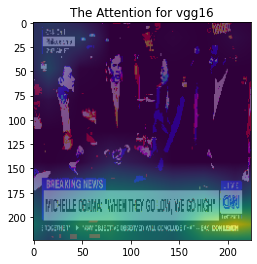

"\ngradCam('ideology_image_dataset/clip_1116.jpg','vgg19','preprocess')\ngradCam('ideology_image_dataset/clip_1116.jpg','densenet121','preprocess')\ngradCam('ideology_image_dataset/clip_1116.jpg','densenet169','preprocess')\ngradCam('ideology_image_dataset/clip_1116.jpg','densenet201','preprocess')\ngradCam('ideology_image_dataset/clip_1116.jpg','mobilenet','preprocess')\n"

In [ ]:
gradCam('ideology_image_dataset/clip_1116.jpg','resnet50','preprocess')
gradCam('ideology_image_dataset/clip_1116.jpg','vgg16','preprocess')
"""
gradCam('ideology_image_dataset/clip_1116.jpg','vgg19','preprocess')
gradCam('ideology_image_dataset/clip_1116.jpg','densenet121','preprocess')
gradCam('ideology_image_dataset/clip_1116.jpg','densenet169','preprocess')
gradCam('ideology_image_dataset/clip_1116.jpg','densenet201','preprocess')
gradCam('ideology_image_dataset/clip_1116.jpg','mobilenet','preprocess')
"""


shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04591157', 'Windsor_tie', 0.5924688), ('n06596364', 'comic_book', 0.14042658), ('n04350905', 'suit', 0.060605247), ('n04005630', 'prison', 0.03245614), ('n02948072', 'candle', 0.013285226), ('n02879718', 'bow', 0.012480637), ('n04525305', 'vending_machine', 0.010167226), ('n02790996', 'barbell', 0.0101209935), ('n03255030', 'dumbbell', 0.0071424902), ('n03770439', 'miniskirt', 0.006076726), ('n03450230', 'gown', 0.0058933296), ('n04501370', 'turnstile', 0.0053094784), ('n02837789', 'bikini', 0.0051520546), ('n03476684', 'hair_slide', 0.0041200635), ('n04550184', 'wardrobe', 0.0034943074), ('n03617480', 'kimono', 0.003484946), ('n04404412', 'television', 0.00288478), ('n03814639', 'neck_brace', 0.0028032628), ('n10148035', 'groom', 0.0025401465), ('n04584207', 'wig', 0.0025029497), ('n02977058', 'cash_machine', 0.0023105643), ('n03461385', 'grocery_store', 0.0022917616), ('n04456115', 'torch', 0.0020673254), ('n04243546', 'slo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


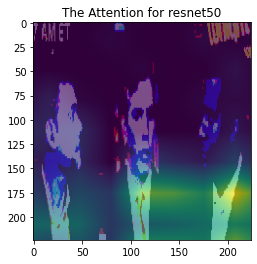

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n10148035', 'groom', 0.4604706), ('n04350905', 'suit', 0.3966307), ('n04591157', 'Windsor_tie', 0.0896308), ('n02883205', 'bow_tie', 0.020242358), ('n02669723', 'academic_gown', 0.0066444487), ('n03450230', 'gown', 0.0049874373), ('n02977058', 'cash_machine', 0.0019001839), ('n03630383', 'lab_coat', 0.0013705711), ('n03787032', 'mortarboard', 0.00116718), ('n04501370', 'turnstile', 0.0010869846), ('n03770439', 'miniskirt', 0.00085330685), ('n04584207', 'wig', 0.0008476513), ('n04325704', 'stole', 0.00064260786), ('n03763968', 'military_uniform', 0.0005699581), ('n04479046', 'trench_coat', 0.0005504859), ('n06596364', 'comic_book', 0.0005410266), ('n03594734', 'jean', 0.0004918576), ('n04005630', 'prison', 0.0004915423), ('n04550184', 'wardrobe', 0.00047857646), ('n02865351', 'bolo_tie', 0.00044780428), ('n02871525', 'bookshop', 0.0004353482), ('n04404412', 'television', 0.00040911319), ('n04356056', 'sunglasses', 0.0003971024), ('n

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


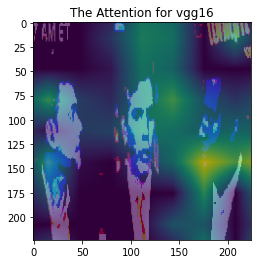

"\ngradCam('clip_1116_face.jpg','vgg19','preprocess')\ngradCam('clip_1116_face.jpg','densenet121','preprocess')\ngradCam('clip_1116_face.jpg','densenet169','preprocess')\ngradCam('clip_1116_face.jpg','densenet201','preprocess')\ngradCam('clip_1116_face.jpg','mobilenet','preprocess')\n"

In [ ]:
gradCam('clip_1116_face.jpg','resnet50','preprocess')
gradCam('clip_1116_face.jpg','vgg16','preprocess')
"""
gradCam('clip_1116_face.jpg','vgg19','preprocess')
gradCam('clip_1116_face.jpg','densenet121','preprocess')
gradCam('clip_1116_face.jpg','densenet169','preprocess')
gradCam('clip_1116_face.jpg','densenet201','preprocess')
gradCam('clip_1116_face.jpg','mobilenet','preprocess')
"""


shape of the input is (1, 224, 224, 3)
conv5_block3_out
[[('n04550184', 'wardrobe', 0.5047944), ('n02669723', 'academic_gown', 0.18765558), ('n04591157', 'Windsor_tie', 0.1163682), ('n04350905', 'suit', 0.06940311), ('n04090263', 'rifle', 0.019711114), ('n04228054', 'ski', 0.01324243), ('n02807133', 'bathing_cap', 0.0063127526), ('n10148035', 'groom', 0.0062896404), ('n03787032', 'mortarboard', 0.005434615), ('n02098286', 'West_Highland_white_terrier', 0.0053832587), ('n04501370', 'turnstile', 0.00504079), ('n02883205', 'bow_tie', 0.0048622186), ('n04356056', 'sunglasses', 0.004843928), ('n04251144', 'snorkel', 0.0035206822), ('n03873416', 'paddle', 0.0026239462), ('n02879718', 'bow', 0.0025200683), ('n02966687', "carpenter's_kit", 0.0022303667), ('n03670208', 'limousine', 0.0020945796), ('n03594734', 'jean', 0.0020279554), ('n02892767', 'brassiere', 0.0014841713), ('n03710637', 'maillot', 0.001439689), ('n06596364', 'comic_book', 0.0014045861), ('n04604644', 'worm_fence', 0.0012559526

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 2048


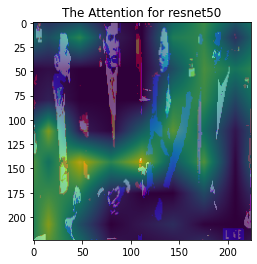

shape of the input is (1, 224, 224, 3)
block5_pool
[[('n04550184', 'wardrobe', 0.51686954), ('n02669723', 'academic_gown', 0.18493162), ('n03787032', 'mortarboard', 0.06585481), ('n04350905', 'suit', 0.0281236), ('n02883205', 'bow_tie', 0.01909384), ('n03041632', 'cleaver', 0.018958932), ('n02879718', 'bow', 0.017804828), ('n03763968', 'military_uniform', 0.0071611153), ('n04325704', 'stole', 0.0069392626), ('n04591157', 'Windsor_tie', 0.006706475), ('n04418357', 'theater_curtain', 0.004466656), ('n04136333', 'sarong', 0.004397069), ('n03594734', 'jean', 0.0042709764), ('n06596364', 'comic_book', 0.0042508133), ('n02667093', 'abaya', 0.0041742423), ('n04228054', 'ski', 0.0041704406), ('n04507155', 'umbrella', 0.003804138), ('n10148035', 'groom', 0.003588256), ('n03485794', 'handkerchief', 0.0030856817), ('n04356056', 'sunglasses', 0.0028030004), ('n03617480', 'kimono', 0.0026932268), ('n04005630', 'prison', 0.002565788), ('n04370456', 'sweatshirt', 0.0024707285), ('n02098286', 'West_Hi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mul 512


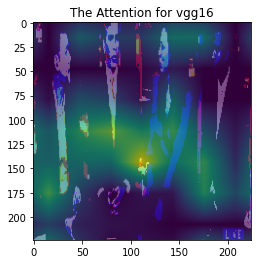

"\ngradCam('clip_1116_person.jpg','vgg19','preprocess')\ngradCam('clip_1116_person.jpg','densenet121','preprocess')\ngradCam('clip_1116_person.jpg','densenet169','preprocess')\ngradCam('clip_1116_person.jpg','densenet201','preprocess')\ngradCam('clip_1116_person.jpg','mobilenet','preprocess')\n"

In [ ]:
gradCam('clip_1116_person.jpg','resnet50','preprocess')
gradCam('clip_1116_person.jpg','vgg16','preprocess')
"""
gradCam('clip_1116_person.jpg','vgg19','preprocess')
gradCam('clip_1116_person.jpg','densenet121','preprocess')
gradCam('clip_1116_person.jpg','densenet169','preprocess')
gradCam('clip_1116_person.jpg','densenet201','preprocess')
gradCam('clip_1116_person.jpg','mobilenet','preprocess')
"""
